# Maqsad diagnostik o’lchovlar asosida bemorda diabet bor-yo’qligini taxmin qilishdir




---

                                                                                                  created by Navruzbek_Abduganiyev




In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Ustunlar:**
*  Pregnancies: homilador bo’lish soni
*  Glucose: glyukozaga test natijasi
*  BloodPressure: diastolik qon bosimi (mm Hg)
*  SkinThickness: Triceps teri burmasining qalinligi (mm)
*  Insulin: 2 soatlik sarum insulini (mu U/ml)
*  BMI: Tana massasi indeksi (vazn kg / (m bo’yi) ^ 2)
*  DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
*  Age: Yosh (yil)
*  Outcome: Class (0 – diabet yo’q, 1 – diabet)

**Tarkib:**

Dataset ichidagi barcha bemorlar kamida 21 yoshli ayollar

In [6]:
df.shape  

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df['Outcome'].value_counts()  # balans juda yomon holatda,farq juda katta

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
corr_matrix=df.corr().abs()
corr_matrix.style.background_gradient(cmap="coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [14]:
df.corrwith(df["Outcome"]).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [ ]:
####################################

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction']:
  print(f"df['{i}']={len(df[df[i]==0])}")  # df ustunlaridagi jami nollar soni

df['Glucose']=5
df['BloodPressure']=35
df['SkinThickness']=227
df['Insulin']=374
df['BMI']=11
df['DiabetesPedigreeFunction']=0


In [31]:
# yoshlar bo'yicha gruppalaymanda,0 qiymatlarni np.nan qiymatga aylantirib chiqaman
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction']]=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction']].replace({0:np.nan})

In [ ]:
# ikki ustundan tashqari hamma ustunlardagi 0 qiymatlar np.nan qiymatga aylantirildi

In [33]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction']:
  print(f"df['{i}']={len(df[df[i]==0])}")  # df ustunlaridagi jami nollar soni

df['Glucose']=0
df['BloodPressure']=0
df['SkinThickness']=0
df['Insulin']=0
df['BMI']=0
df['DiabetesPedigreeFunction']=0


In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
# yoshlar ko'lami bo'yicha ham chegaralab bitta df ga ustun po'shamiz
bins=[20,24.5,29.5,41.5,81.5]  # bunday o'nlik qiymat berishimga sabab,yoshni saralab olishda komp notogri ishlamaydi
df["age_fill"]=pd.cut(df["Age"],bins=bins,labels=[1,2,3,4])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_fill
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,4
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,3
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,3
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,3


In [39]:
pd.cut(df.Age,bins).value_counts()  # oraliqqa kiruvchi yoshlarning sonini ko'rishimiz mumkin "DEYARLI BALANS YAXSHI"

(20.0, 24.5]    219
(29.5, 41.5]    200
(24.5, 29.5]    177
(41.5, 81.5]    172
Name: Age, dtype: int64

In [41]:
df["age_fill"].value_counts()

1    219
3    200
2    177
4    172
Name: age_fill, dtype: int64

In [53]:
from numpy.lib.function_base import median
df[df["age_fill"]==1]=df[df["age_fill"]==1].fillna(method="ffill")
df[df["age_fill"]==2]=df[df["age_fill"]==2].fillna(method="ffill")
df[df["age_fill"]==3]=df[df["age_fill"]==3].fillna(method="ffill")
df[df["age_fill"]==4]=df[df["age_fill"]==4].fillna(method="ffill")

In [57]:
df["Insulin"]=df["Insulin"].fillna(method="bfill")
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
age_fill                    0
dtype: int64

In [54]:
df.isnull().sum()   # bitta kichik yutuqqa erishdik,yoshlar ko'lami bo'yicha nan qiymtalarni to'ldirib chiqdik

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     3
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
age_fill                    0
dtype: int64

In [60]:
df.corrwith(df["Outcome"]).sort_values(ascending=False) #corr ni biroz bolsa ham ko'taribiz::)

Outcome                     1.000000
Glucose                     0.494973
BMI                         0.310775
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.205794
Insulin                     0.174059
DiabetesPedigreeFunction    0.173844
BloodPressure               0.171629
dtype: float64

# **ML ga tayyorlaymiz**

In [61]:
# ML ga tayyorlanamiz
df.drop("age_fill",axis=1,inplace=True)
X = df.drop("Outcome",axis=1).values
y = df["Outcome"]

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
X = scaler.fit_transform(X)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=21,train_size=0.8)

# **ML**

In [65]:
# modelni quramiz
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

In [66]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [67]:
y_predict = knn_model.predict(X_test)

# **Baholash**

**Jaccard index**

In [68]:
from sklearn.metrics import jaccard_score
jaccard_score(y_predict,y_test)

0.41333333333333333

**confusion matrix**

In [71]:
from sklearn.metrics import confusion_matrix
confu_matr = confusion_matrix(y_predict,y_test)
confu_matr  #aslini olganda juda yomon,:))

array([[79, 29],
       [15, 31]])

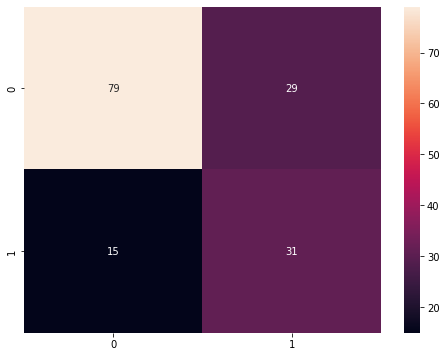

In [74]:
plt.figure(figsize=(8,6))
sns.heatmap(confu_matr,annot=True)
plt.show()

In [ ]:
# o'lchashning boshqa usullarini ham ko'ramiz


In [81]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"precision={precision} \nrecall={recall} \nf1={f1} \naccuracy={accuracy}")

precision=0.6739130434782609 
recall=0.5166666666666667 
f1=0.5849056603773585 
accuracy=0.7142857142857143


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       108
           1       0.52      0.67      0.58        46

    accuracy                           0.71       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.74      0.71      0.72       154



**Cross-validation yordamida ham tekshirishimiz mumkin**

In [85]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=knn_model,X=X,y=y,cv=5)

print(f"Classification_report: {classification_report(predict,y)}")

Classification_report:               precision    recall  f1-score   support

           0       0.84      0.79      0.81       534
           1       0.58      0.66      0.62       234

    accuracy                           0.75       768
   macro avg       0.71      0.73      0.72       768
weighted avg       0.76      0.75      0.75       768



In [88]:
from sklearn.model_selection import cross_val_predict
predict_ = cross_val_predict(estimator=knn_model,X=X_test,y=y_test,cv=5)

print(f"Classification_report: {classification_report(predict_,y_test)}")

Classification_report:               precision    recall  f1-score   support

           0       0.78      0.74      0.76        98
           1       0.58      0.62      0.60        56

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.70      0.70       154



# Eng yaxshi k ni topish
for yordamida

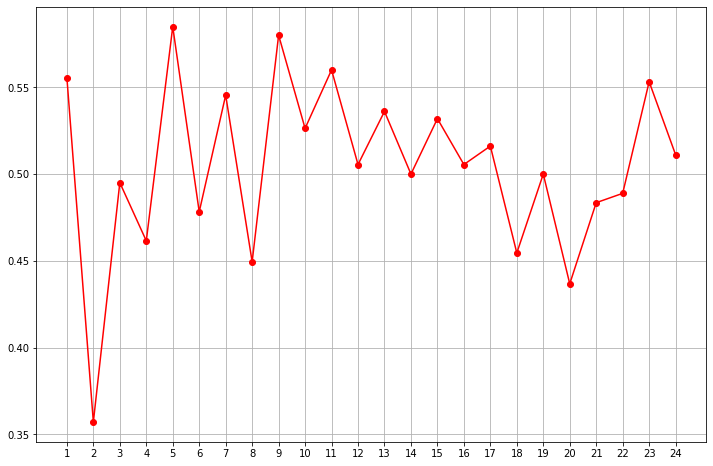

In [96]:
from matplotlib.markers import MarkerStyle
f=[]
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  predict = knn.predict(X_test)
  f.append(f1_score(predict,y_test))
plt.figure(figsize=(12,8))
plt.xticks(range(1,25))
plt.plot(range(1,25),f,marker="o",color="r")
plt.grid()
plt.show()             
# grafikning y ustunidagi max qiymat biz uchun eng optimal qiymat boladi.Demak n_neighbors=5 eng yaxshi javob ekan

## **Grid Search yordamida ham foydali ma'luotlarni olishimiz mumkin**

In [105]:
#  knn = KNeighborsClassifier(n_neighbors=k) ga teng edi
knn_ = KNeighborsClassifier(n_neighbors=5)
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors":np.arange(1,25)}

knn_gscv = GridSearchCV(knn_,param_grid,cv=5)

knn_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [113]:
knn_gscv.cv_results_  #bu usulda bizga kerak bolgan eng yaxshi ustunlarni ko'rishimiz mumkin

{'mean_fit_time': array([0.00431666, 0.00293479, 0.00293722, 0.00299044, 0.00267749,
        0.00282269, 0.00261378, 0.00383716, 0.00339928, 0.00295129,
        0.00276046, 0.00291877, 0.00280704, 0.00279169, 0.00372138,
        0.00275645, 0.00287728, 0.00300999, 0.00302162, 0.00268016,
        0.00279927, 0.00294638, 0.00263495, 0.00257301]),
 'mean_score_time': array([0.01155095, 0.01293812, 0.01195998, 0.01481204, 0.01426482,
        0.01285939, 0.01278682, 0.01403556, 0.01596198, 0.01441426,
        0.01444998, 0.01305571, 0.01513276, 0.01400652, 0.0137423 ,
        0.01353164, 0.01411719, 0.01553082, 0.01375389, 0.01458378,
        0.01728206, 0.01413631, 0.01329575, 0.01673608]),
 'mean_test_score': array([0.701808  , 0.70963416, 0.7253459 , 0.72529497, 0.7500382 ,
        0.73181394, 0.75524149, 0.7500382 , 0.74615907, 0.74356167,
        0.75136236, 0.75136236, 0.7709023 , 0.76308463, 0.77091928,
        0.75527544, 0.75787285, 0.75137085, 0.76181139, 0.75918004,
        0.757

In [107]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 21, 22, 17, 20, 12, 16, 18, 19, 14, 14,  2,  5,  1, 11, 10,
       13,  6,  7,  9,  8,  4,  3], dtype=int32)

In [109]:
knn_gscv.best_params_  
#eng yaxshi ko'rsatgichni olishimiz mumkin n_neghbors uchun:bunda biz 

{'n_neighbors': 15}

In [110]:
knn_gscv.best_score_  # eng yaxshi ko'rsatgich

0.7709192768016297

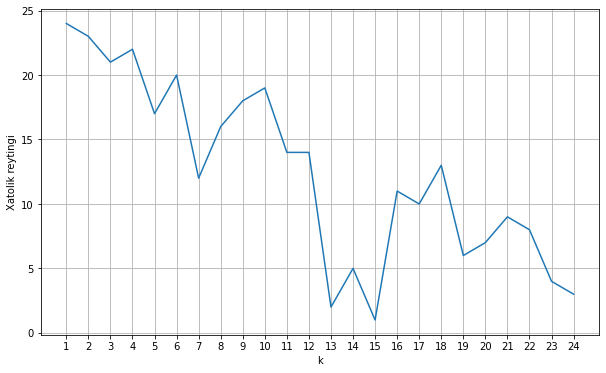

In [111]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

In [ ]:
#n_neighbors=15 da eng kam xtolikka olib kelyapti,bu yaxshi



---
                                                    created by Navruzbek_Anduganiyev
